In [1]:
import pandas as pd
import glob
import yfinance as yf

# Trading Volume Analysis: S&P 500 vs DAX

Let's pull trading volume data for both indices using yfinance.

In [2]:
# Define the ticker symbols

sp500_ticker = "^GSPC"  
dax_ticker = "^STOXX50E"  #



In [3]:
# Set the date range for data collection
import datetime

# Get data for the last year
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*10)

print(f"Fetching data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Fetching data from 2015-10-25 to 2025-10-22


In [4]:
# Fetch S&P 500 data (using SPY ETF as proxy)
print("Fetching S&P 500 data...")
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)

# Display basic info about S&P 500 data
print(f"\nS&P 500 (SPY) Data Shape: {sp500_data.shape}")
print("Columns:", list(sp500_data.columns))
print("\nFirst few rows:")
print(sp500_data.head())

Fetching S&P 500 data...


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/3144704678.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Fetching S&P 500 data...


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/3144704678.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


S&P 500 (SPY) Data Shape: (2512, 5)
Columns: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]

First few rows:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-10-26  2071.179932  2075.139893  2066.530029  2075.080078  3385800000
2015-10-27  2065.889893  2070.370117  2058.840088  2068.750000  4216880000
2015-10-28  2090.350098  2090.350098  2063.110107  2066.479980  4698110000
2015-10-29  2089.409912  2092.520020  2082.629883  2088.350098  4008940000
2015-10-30  2079.360107  2094.320068  2079.340088  2090.000000  4256200000


In [5]:
# Fetch DAX data
print("Fetching DAX data...")
dax_data = yf.download(dax_ticker, start=start_date, end=end_date)

# Display basic info about DAX data
print(f"\nDAX Data Shape: {dax_data.shape}")
print("Columns:", list(dax_data.columns))
print("\nFirst few rows:")
print(dax_data.head())

/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/752661403.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dax_data = yf.download(dax_ticker, start=start_date, end=end_date)


Fetching DAX data...


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/752661403.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dax_data = yf.download(dax_ticker, start=start_date, end=end_date)


Fetching DAX data...


[*********************100%***********************]  1 of 1 completed


DAX Data Shape: (2513, 5)
Columns: [('Close', '^STOXX50E'), ('High', '^STOXX50E'), ('Low', '^STOXX50E'), ('Open', '^STOXX50E'), ('Volume', '^STOXX50E')]

First few rows:
Price             Close         High          Low         Open    Volume
Ticker        ^STOXX50E    ^STOXX50E    ^STOXX50E    ^STOXX50E ^STOXX50E
Date                                                                    
2015-10-26  3414.600098  3433.719971  3402.389893  3422.409912  36960800
2015-10-27  3381.010010  3417.020020  3381.010010  3410.409912  40078700
2015-10-28  3421.090088  3429.550049  3383.770020  3383.770020  38536100
2015-10-29  3413.389893  3435.120117  3387.689941  3427.790039  56285700
2015-10-30  3418.229980  3426.870117  3392.340088  3415.899902  47593500


In [6]:
# Extract volume data specifically
sp500_volume = sp500_data['Volume'].copy()
dax_volume = dax_data['Volume'].copy()

# Create a combined volume DataFrame with proper index handling
volume_comparison = pd.DataFrame(index=sp500_volume.index)
volume_comparison['SP500_Volume'] = sp500_volume
volume_comparison['DAX_Volume'] = dax_volume

# Remove any rows where either volume is NaN
volume_comparison = volume_comparison.dropna()

print("Volume Comparison DataFrame:")
print(volume_comparison.head(10))
print(f"\nData points available: {len(volume_comparison)}")
print(f"\nSummary statistics:")
print(volume_comparison.describe())

Volume Comparison DataFrame:
            SP500_Volume  DAX_Volume
Date                                
2015-10-26    3385800000  36960800.0
2015-10-27    4216880000  40078700.0
2015-10-28    4698110000  38536100.0
2015-10-29    4008940000  56285700.0
2015-10-30    4256200000  47593500.0
2015-11-02    3760020000  37962200.0
2015-11-03    4272060000  54718500.0
2015-11-04    4078870000  53179500.0
2015-11-05    4051890000  47880500.0
2015-11-06    4369020000  53092100.0

Data points available: 2447

Summary statistics:
       SP500_Volume    DAX_Volume
count  2.447000e+03  2.447000e+03
mean   4.143594e+09  3.720718e+07
std    1.015406e+09  1.740280e+07
min    0.000000e+00  0.000000e+00
25%    3.507375e+09  2.637745e+07
50%    3.919190e+09  3.345780e+07
75%    4.555360e+09  4.294475e+07
max    9.976520e+09  2.358453e+08


In [7]:
# Alternative approach with better error handling
print("Data shapes:")
print(f"S&P 500 data: {sp500_data.shape}")
print(f"DAX data: {dax_data.shape}")

# Check if we have volume data
print(f"\nS&P 500 volume data available: {'Volume' in sp500_data.columns}")
print(f"DAX volume data available: {'Volume' in dax_data.columns}")

# Create volume comparison using merge to handle different indices
if 'Volume' in sp500_data.columns and 'Volume' in dax_data.columns:
    # Reset index to make date a column for merging
    sp500_vol_df = sp500_data[['Volume']].reset_index()
    sp500_vol_df.columns = ['Date', 'SP500_Volume']
    
    dax_vol_df = dax_data[['Volume']].reset_index()
    dax_vol_df.columns = ['Date', 'DAX_Volume']
    
    # Merge on date
    volume_comparison = pd.merge(sp500_vol_df, dax_vol_df, on='Date', how='inner')
    volume_comparison.set_index('Date', inplace=True)
    
    print(f"\nSuccessfully created volume comparison with {len(volume_comparison)} rows")
else:
    print("Volume data not available in one or both datasets")
    volume_comparison = None

Data shapes:
S&P 500 data: (2512, 5)
DAX data: (2513, 5)

S&P 500 volume data available: True
DAX volume data available: True

Successfully created volume comparison with 2447 rows


In [8]:
# Debug: Let's check what we actually got from yfinance
print("S&P 500 data info:")
print(f"Type: {type(sp500_data)}")
print(f"Shape: {sp500_data.shape}")
print(f"Columns: {list(sp500_data.columns)}")
print(f"Index: {sp500_data.index[:5]}")  # First 5 index values
print()

print("DAX data info:")
print(f"Type: {type(dax_data)}")
print(f"Shape: {dax_data.shape}")
print(f"Columns: {list(dax_data.columns)}")
print(f"Index: {dax_data.index[:5]}")  # First 5 index values

S&P 500 data info:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (2512, 5)
Columns: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]
Index: DatetimeIndex(['2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

DAX data info:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (2513, 5)
Columns: [('Close', '^STOXX50E'), ('High', '^STOXX50E'), ('Low', '^STOXX50E'), ('Open', '^STOXX50E'), ('Volume', '^STOXX50E')]
Index: DatetimeIndex(['2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [9]:
# Optional: Save the volume data to CSV
volume_comparison.to_csv('sp500_dax_volume_comparison.csv')

# Show recent trading volumes
print("\nMost recent 10 trading days:")
print(volume_comparison.tail(10))


Most recent 10 trading days:
            SP500_Volume  DAX_Volume
Date                                
2025-10-08    5383130000    18527600
2025-10-09    5385020000    16282500
2025-10-10    6596610000    19991400
2025-10-13    5303960000    13913600
2025-10-14    5666920000    19976600
2025-10-15    5633060000    17119800
2025-10-16    6048180000    19328400
2025-10-17    5358120000    29083500
2025-10-20    4672170000    18044000
2025-10-21    5245020000    14789500


## Additional Options for Data Collection

Here are some alternative approaches and considerations:

In [10]:
# Alternative methods for getting volume data:

# 1. For more granular data (intraday), you can use different periods:
# Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# Example for intraday data (last 5 days with 1-hour intervals):
# sp500_intraday = yf.download(sp500_ticker, period="5d", interval="1h")
# dax_intraday = yf.download(dax_ticker, period="5d", interval="1h")

# 2. Alternative DAX representations:
alternative_dax_tickers = [
    "EXS1.DE",  # iShares Core DAX UCITS ETF
    "XDAX.DE",  # Alternative DAX representation
    "DAXEX.DE"  # DAX with dividends
]

print("Alternative DAX ticker symbols to try:")
for ticker in alternative_dax_tickers:
    print(f"- {ticker}")

# 3. For S&P 500, you could also use:
print("\nAlternative S&P 500 representations:")
print("- ^GSPC (S&P 500 Index)")
print("- SPY (SPDR S&P 500 ETF)")
print("- VOO (Vanguard S&P 500 ETF)")
print("- IVV (iShares Core S&P 500 ETF)")

Alternative DAX ticker symbols to try:
- EXS1.DE
- XDAX.DE
- DAXEX.DE

Alternative S&P 500 representations:
- ^GSPC (S&P 500 Index)
- SPY (SPDR S&P 500 ETF)
- VOO (Vanguard S&P 500 ETF)
- IVV (iShares Core S&P 500 ETF)


# Statistical Outlier Detection for Trading Volumes

Let's implement several methods to identify dates with abnormally high or low trading volumes.

In [11]:
# Import additional libraries for statistical analysis
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib for better plotting
plt.style.use('default')
sns.set_palette("husl")

In [12]:
# Method 1: Z-Score Analysis (assumes normal distribution)
def detect_outliers_zscore(data, threshold=2.5):
    """
    Detect outliers using Z-score method
    threshold: number of standard deviations from mean
    """
    z_scores = np.abs(stats.zscore(data.dropna()))
    outliers = z_scores > threshold
    return outliers

# Apply Z-score method to both datasets
sp500_outliers_zscore = detect_outliers_zscore(volume_comparison['SP500_Volume'],1.65)
dax_outliers_zscore = detect_outliers_zscore(volume_comparison['DAX_Volume'],1.65)

print("Z-Score Method (threshold = 1.65 standard deviations):")
print(f"S&P 500 outliers found: {sp500_outliers_zscore.sum()}")
print(f"DAX outliers found: {dax_outliers_zscore.sum()}")

# Show some outlier dates for S&P 500
sp500_outlier_dates = volume_comparison[sp500_outliers_zscore].index
print(f"\nS&P 500 outlier dates (first 10):")
for date in sp500_outlier_dates[:10]:
    vol = volume_comparison.loc[date, 'SP500_Volume']
    print(f"  {date.strftime('%Y-%m-%d')}: {vol:,}")

# Show some outlier dates for DAX
dax_outlier_dates = volume_comparison[dax_outliers_zscore].index
print(f"\nDAX outlier dates (first 10):")
for date in dax_outlier_dates[:10]:
    vol = volume_comparison.loc[date, 'DAX_Volume']
    print(f"  {date.strftime('%Y-%m-%d')}: {vol:,}")

Z-Score Method (threshold = 1.65 standard deviations):
S&P 500 outliers found: 169
DAX outliers found: 162

S&P 500 outlier dates (first 10):
  2015-11-27: 1,466,840,000
  2015-12-18: 6,683,070,000
  2015-12-30: 2,367,430,000
  2016-01-20: 6,416,070,000
  2016-03-04: 6,049,930,000
  2016-03-18: 6,503,140,000
  2016-06-24: 7,597,450,000
  2016-11-09: 6,267,590,000
  2016-11-10: 6,458,450,000
  2016-11-25: 1,584,590,000

DAX outlier dates (first 10):
  2015-12-03: 84,501,300
  2015-12-18: 81,937,000
  2016-01-07: 74,948,800
  2016-01-15: 92,082,700
  2016-01-20: 83,727,700
  2016-01-21: 94,843,300
  2016-01-22: 79,292,900
  2016-01-26: 76,968,900
  2016-01-28: 74,372,000
  2016-02-03: 84,603,500


In [13]:
# Method 2: Interquartile Range (IQR) Method (more robust to distribution shape)
def detect_outliers_iqr(data, multiplier=1.5):
    """
    Detect outliers using IQR method
    multiplier: how many IQRs away from Q1/Q3 to consider outlier
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

# Apply IQR method
sp500_outliers_iqr, sp500_lower, sp500_upper = detect_outliers_iqr(volume_comparison['SP500_Volume'],1)
dax_outliers_iqr, dax_lower, dax_upper = detect_outliers_iqr(volume_comparison['DAX_Volume'],1)

print("IQR Method (1.5 * IQR beyond Q1/Q3):")
print(f"S&P 500 outliers found: {sp500_outliers_iqr.sum()}")
print(f"  Normal range: {sp500_lower:,.0f} - {sp500_upper:,.0f}")
print(f"DAX outliers found: {dax_outliers_iqr.sum()}")
print(f"  Normal range: {dax_lower:,.0f} - {dax_upper:,.0f}")

# Show extreme outliers for both
print(f"\nS&P 500 extreme volume days (IQR method):")
sp500_iqr_outliers = volume_comparison[sp500_outliers_iqr]['SP500_Volume'].sort_values(ascending=False)
for date, vol in sp500_iqr_outliers.head(5).items():
    print(f"  {date.strftime('%Y-%m-%d')}: {vol:,}")

print(f"\nDAX extreme volume days (IQR method):")
dax_iqr_outliers = volume_comparison[dax_outliers_iqr]['DAX_Volume'].sort_values(ascending=False)
for date, vol in dax_iqr_outliers.head(5).items():
    print(f"  {date.strftime('%Y-%m-%d')}: {vol:,}")

IQR Method (1.5 * IQR beyond Q1/Q3):
S&P 500 outliers found: 207
  Normal range: 2,459,390,000 - 5,603,345,000
DAX outliers found: 232
  Normal range: 9,810,150 - 59,512,050

S&P 500 extreme volume days (IQR method):
  2021-01-27: 9,976,520,000
  2025-04-09: 9,489,600,000
  2025-03-21: 9,367,460,000
  2023-03-17: 9,354,280,000
  2025-09-19: 9,125,960,000

DAX extreme volume days (IQR method):
  2016-06-24: 235,845,300
  2016-06-27: 170,782,200
  2020-03-12: 167,329,900
  2020-03-09: 143,365,800
  2020-09-18: 137,350,900


In [14]:
# Method 3: Modified Z-Score (using median absolute deviation - more robust)
def detect_outliers_modified_zscore(data, threshold=3.5):
    """
    Detect outliers using Modified Z-score with MAD (Median Absolute Deviation)
    More robust to outliers than standard Z-score
    """
    median = np.median(data.dropna())
    mad = np.median(np.abs(data.dropna() - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    outliers = np.abs(modified_z_scores) > threshold
    return outliers

# Apply Modified Z-score method
sp500_outliers_mod_z = detect_outliers_modified_zscore(volume_comparison['SP500_Volume'],1.65)
dax_outliers_mod_z = detect_outliers_modified_zscore(volume_comparison['DAX_Volume'],1.65)

print("Modified Z-Score Method (threshold = 1.65):")
print(f"S&P 500 outliers found: {sp500_outliers_mod_z.sum()}")
print(f"DAX outliers found: {dax_outliers_mod_z.sum()}")

# Show statistics
print(f"\nS&P 500 volume statistics:")
print(f"  Median: {volume_comparison['SP500_Volume'].median():,.0f}")
print(f"  Mean: {volume_comparison['SP500_Volume'].mean():,.0f}")
print(f"  Std: {volume_comparison['SP500_Volume'].std():,.0f}")

print(f"\nDAX volume statistics:")
print(f"  Median: {volume_comparison['DAX_Volume'].median():,.0f}")
print(f"  Mean: {volume_comparison['DAX_Volume'].mean():,.0f}")
print(f"  Std: {volume_comparison['DAX_Volume'].std():,.0f}")

Modified Z-Score Method (threshold = 1.65):
S&P 500 outliers found: 352
DAX outliers found: 348

S&P 500 volume statistics:
  Median: 3,919,190,000
  Mean: 4,143,593,641
  Std: 1,015,406,087

DAX volume statistics:
  Median: 33,457,800
  Mean: 37,207,181
  Std: 17,402,797


In [19]:
# Method 4: Percentile-based Detection
def detect_outliers_percentile(data, lower_percentile=1, upper_percentile=99):
    """
    Detect outliers using percentiles
    """
    lower_threshold = data.quantile(lower_percentile / 100)
    upper_threshold = data.quantile(upper_percentile / 100)
    
    outliers = (data < lower_threshold) | (data > upper_threshold)
    return outliers, lower_threshold, upper_threshold

# Apply percentile method (1st and 99th percentiles)
sp500_outliers_pct, sp500_lower_pct, sp500_upper_pct = detect_outliers_percentile(volume_comparison['SP500_Volume'])
dax_outliers_pct, dax_lower_pct, dax_upper_pct = detect_outliers_percentile(volume_comparison['DAX_Volume'])

print("Percentile Method (1st and 99th percentiles):")
print(f"S&P 500 outliers found: {sp500_outliers_pct.sum()}")
print(f"  Thresholds: {sp500_lower_pct:,.0f} - {sp500_upper_pct:,.0f}")
print(f"DAX outliers found: {dax_outliers_pct.sum()}")
print(f"  Thresholds: {dax_lower_pct:,.0f} - {dax_upper_pct:,.0f}")

Percentile Method (1st and 99th percentiles):
S&P 500 outliers found: 50
  Thresholds: 2,465,782,800 - 8,052,300,400
DAX outliers found: 50
  Thresholds: 13,942,672 - 97,542,908


In [20]:
# Create a comprehensive outlier analysis summary
outlier_summary = pd.DataFrame({
    'Date': volume_comparison.index,
    'SP500_Volume': volume_comparison['SP500_Volume'],
    'DAX_Volume': volume_comparison['DAX_Volume'],
    'SP500_ZScore_Outlier': sp500_outliers_zscore,
    'SP500_IQR_Outlier': sp500_outliers_iqr,
    'SP500_ModZ_Outlier': sp500_outliers_mod_z,
    'SP500_Pct_Outlier': sp500_outliers_pct,
    'DAX_ZScore_Outlier': dax_outliers_zscore,
    'DAX_IQR_Outlier': dax_outliers_iqr,
    'DAX_ModZ_Outlier': dax_outliers_mod_z,
    'DAX_Pct_Outlier': dax_outliers_pct
})

# Count how many methods flagged each date as outlier
outlier_summary['SP500_Outlier_Count'] = (
    outlier_summary['SP500_ZScore_Outlier'] + 
    outlier_summary['SP500_IQR_Outlier'] + 
    outlier_summary['SP500_ModZ_Outlier'] + 
    outlier_summary['SP500_Pct_Outlier']
)

outlier_summary['DAX_Outlier_Count'] = (
    outlier_summary['DAX_ZScore_Outlier'] + 
    outlier_summary['DAX_IQR_Outlier'] + 
    outlier_summary['DAX_ModZ_Outlier'] + 
    outlier_summary['DAX_Pct_Outlier']
)

# Find dates that are outliers according to multiple methods
print("Consensus Outliers (flagged by multiple methods):")
print("\nS&P 500 - Dates flagged by 3+ methods:")
sp500_consensus = outlier_summary[outlier_summary['SP500_Outlier_Count'] >= 3].sort_values('SP500_Volume', ascending=False)
print(sp500_consensus[['Date', 'SP500_Volume', 'SP500_Outlier_Count']].head(10))

print("\nDAX - Dates flagged by 3+ methods:")
dax_consensus = outlier_summary[outlier_summary['DAX_Outlier_Count'] >= 3].sort_values('DAX_Volume', ascending=False)
print(dax_consensus[['Date', 'DAX_Volume', 'DAX_Outlier_Count']].head(10))

Consensus Outliers (flagged by multiple methods):

S&P 500 - Dates flagged by 3+ methods:
Empty DataFrame
Columns: [Date, SP500_Volume, SP500_Outlier_Count]
Index: []

DAX - Dates flagged by 3+ methods:
Empty DataFrame
Columns: [Date, DAX_Volume, DAX_Outlier_Count]
Index: []


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/228565568.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(volume_comparison['SP500_Volume'].dropna(), labels=['S&P 500'])
/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/228565568.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(volume_comparison['DAX_Volume'].dropna(), labels=['DAX'])


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/228565568.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(volume_comparison['SP500_Volume'].dropna(), labels=['S&P 500'])
/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/228565568.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(volume_comparison['DAX_Volume'].dropna(), labels=['DAX'])


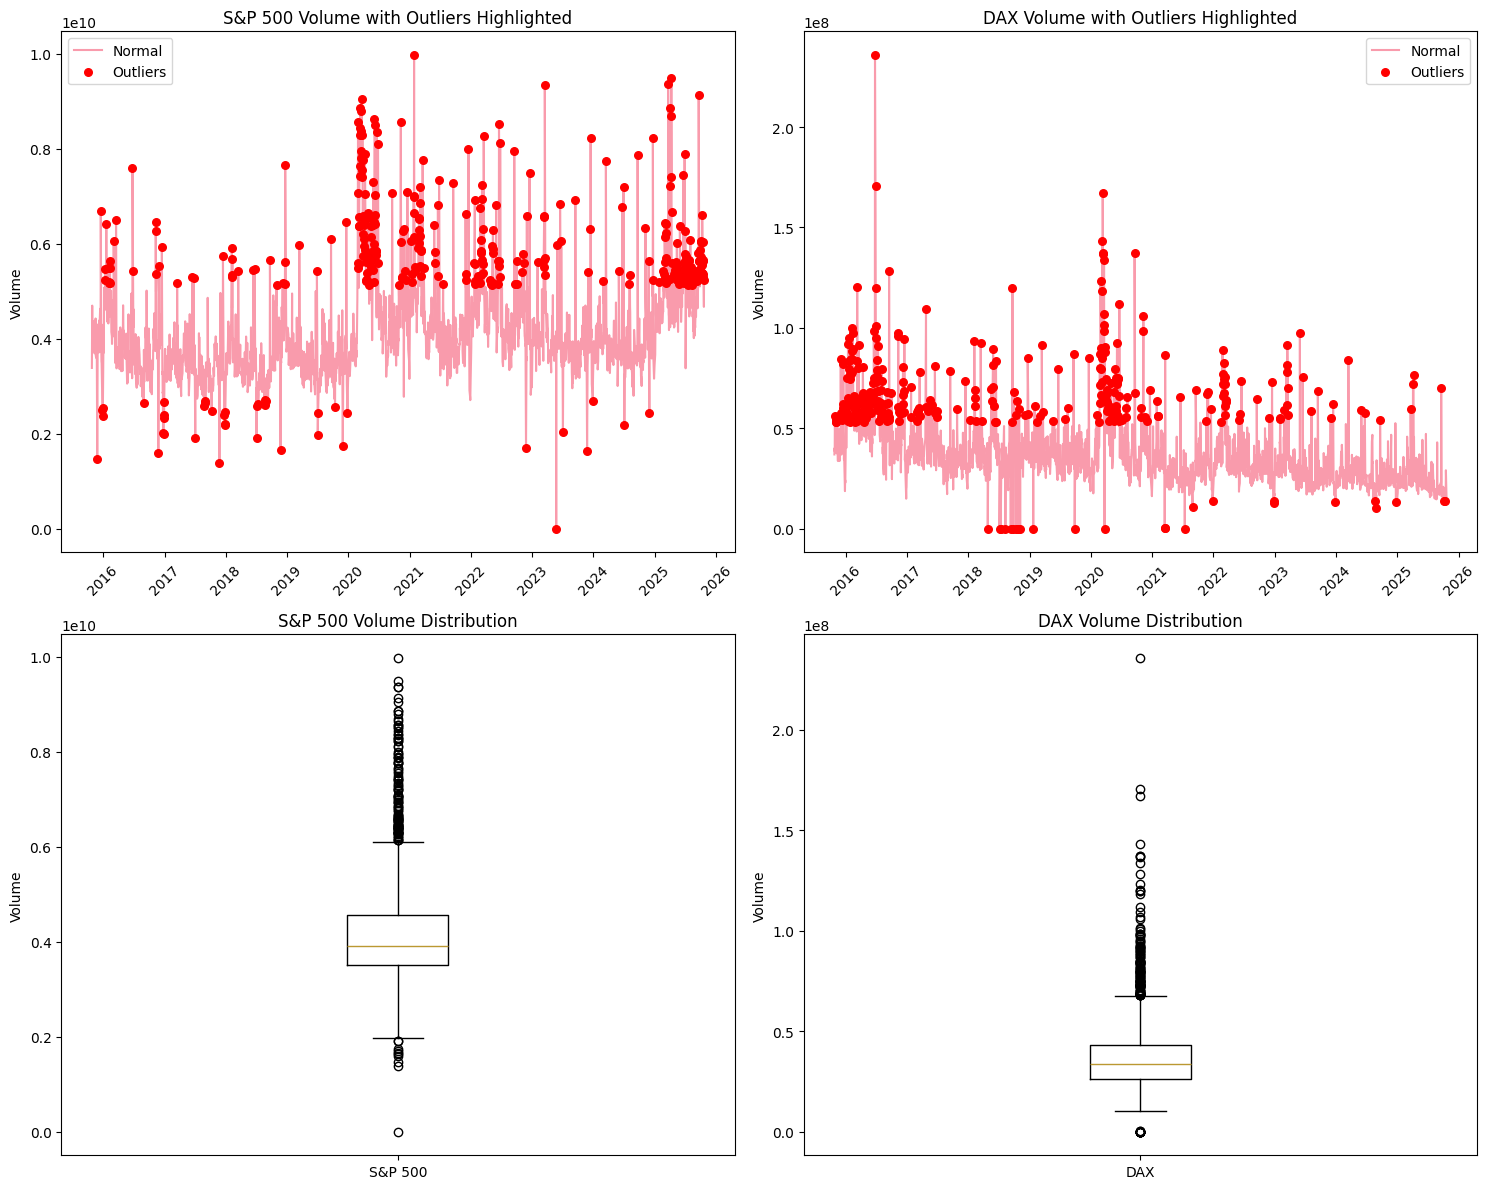

In [21]:
# Visualization of outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# S&P 500 time series with outliers highlighted
axes[0, 0].plot(volume_comparison.index, volume_comparison['SP500_Volume'], alpha=0.7, label='Normal')
sp500_all_outliers = outlier_summary['SP500_Outlier_Count'] > 0
axes[0, 0].scatter(volume_comparison.index[sp500_all_outliers], 
                   volume_comparison['SP500_Volume'][sp500_all_outliers], 
                   color='red', s=30, label='Outliers', zorder=5)
axes[0, 0].set_title('S&P 500 Volume with Outliers Highlighted')
axes[0, 0].set_ylabel('Volume')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# DAX time series with outliers highlighted
axes[0, 1].plot(volume_comparison.index, volume_comparison['DAX_Volume'], alpha=0.7, label='Normal')
dax_all_outliers = outlier_summary['DAX_Outlier_Count'] > 0
axes[0, 1].scatter(volume_comparison.index[dax_all_outliers], 
                   volume_comparison['DAX_Volume'][dax_all_outliers], 
                   color='red', s=30, label='Outliers', zorder=5)
axes[0, 1].set_title('DAX Volume with Outliers Highlighted')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# S&P 500 box plot
axes[1, 0].boxplot(volume_comparison['SP500_Volume'].dropna(), labels=['S&P 500'])
axes[1, 0].set_title('S&P 500 Volume Distribution')
axes[1, 0].set_ylabel('Volume')

# DAX box plot
axes[1, 1].boxplot(volume_comparison['DAX_Volume'].dropna(), labels=['DAX'])
axes[1, 1].set_title('DAX Volume Distribution')
axes[1, 1].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [22]:
# Statistical tests for outliers
from scipy.stats import normaltest, shapiro

print("Statistical Tests for Distribution Normality:")
print("=" * 50)

# Test normality of S&P 500 volumes
sp500_vol_clean = volume_comparison['SP500_Volume'].dropna()
dax_vol_clean = volume_comparison['DAX_Volume'].dropna()

# D'Agostino-Pearson normality test
sp500_dagostino_stat, sp500_dagostino_p = normaltest(sp500_vol_clean)
dax_dagostino_stat, dax_dagostino_p = normaltest(dax_vol_clean)

print(f"S&P 500 Volume Normality (D'Agostino-Pearson test):")
print(f"  Statistic: {sp500_dagostino_stat:.4f}")
print(f"  P-value: {sp500_dagostino_p:.4f}")
print(f"  Normal distribution: {'No' if sp500_dagostino_p < 0.05 else 'Yes'}")

print(f"\nDAX Volume Normality (D'Agostino-Pearson test):")
print(f"  Statistic: {dax_dagostino_stat:.4f}")
print(f"  P-value: {dax_dagostino_p:.4f}")
print(f"  Normal distribution: {'No' if dax_dagostino_p < 0.05 else 'Yes'}")

# Recommendations based on distribution
print("\nRecommendations:")
if sp500_dagostino_p < 0.05:
    print("• S&P 500 volumes are NOT normally distributed - use IQR or Modified Z-score methods")
else:
    print("• S&P 500 volumes are normally distributed - Z-score method is appropriate")

if dax_dagostino_p < 0.05:
    print("• DAX volumes are NOT normally distributed - use IQR or Modified Z-score methods")
else:
    print("• DAX volumes are normally distributed - Z-score method is appropriate")

Statistical Tests for Distribution Normality:
S&P 500 Volume Normality (D'Agostino-Pearson test):
  Statistic: 823.5620
  P-value: 0.0000
  Normal distribution: No

DAX Volume Normality (D'Agostino-Pearson test):
  Statistic: 1444.0206
  P-value: 0.0000
  Normal distribution: No

Recommendations:
• S&P 500 volumes are NOT normally distributed - use IQR or Modified Z-score methods
• DAX volumes are NOT normally distributed - use IQR or Modified Z-score methods


In [23]:
# Save outlier analysis results
outlier_summary_export = outlier_summary[outlier_summary['SP500_Outlier_Count'] + outlier_summary['DAX_Outlier_Count'] > 0].copy()
outlier_summary_export['Date_Formatted'] = outlier_summary_export['Date'].dt.strftime('%Y-%m-%d')

# Reorder columns for better readability
cols_order = ['Date_Formatted', 'SP500_Volume', 'DAX_Volume', 
              'SP500_Outlier_Count', 'DAX_Outlier_Count',
              'SP500_ZScore_Outlier', 'SP500_IQR_Outlier', 'SP500_ModZ_Outlier', 'SP500_Pct_Outlier',
              'DAX_ZScore_Outlier', 'DAX_IQR_Outlier', 'DAX_ModZ_Outlier', 'DAX_Pct_Outlier']

outlier_summary_export = outlier_summary_export[cols_order]
outlier_summary_export.to_csv('volume_outliers_analysis.csv', index=False)

print("Outlier analysis saved to 'volume_outliers_analysis.csv'")
print(f"\nTotal dates with outliers: {len(outlier_summary_export)}")
print(f"High-confidence outliers (3+ methods agree): {len(outlier_summary_export[(outlier_summary_export['SP500_Outlier_Count'] >= 3) | (outlier_summary_export['DAX_Outlier_Count'] >= 3)])}")

# Summary statistics
print(f"\nOutlier Detection Summary:")
print(f"{'Method':<20} {'SP500 Outliers':<15} {'DAX Outliers'}")
print(f"{'='*20:<20} {'='*15:<15} {'='*12}")
print(f"{'Z-Score':<20} {sp500_outliers_zscore.sum():<15} {dax_outliers_zscore.sum()}")
print(f"{'IQR':<20} {sp500_outliers_iqr.sum():<15} {dax_outliers_iqr.sum()}")
print(f"{'Modified Z-Score':<20} {sp500_outliers_mod_z.sum():<15} {dax_outliers_mod_z.sum()}")
print(f"{'Percentile':<20} {sp500_outliers_pct.sum():<15} {dax_outliers_pct.sum()}")

Outlier analysis saved to 'volume_outliers_analysis.csv'

Total dates with outliers: 562
High-confidence outliers (3+ methods agree): 0

Outlier Detection Summary:
Method               SP500 Outliers  DAX Outliers
==================== =============== ============
Z-Score              169             162
IQR                  207             232
Modified Z-Score     352             348
Percentile           50              50


In [24]:
outlier_summary_export[["Date_Formatted", "SP500_Volume", "DAX_Volume", "SP500_IQR_Outlier", "SP500_ModZ_Outlier", "DAX_IQR_Outlier", "DAX_ModZ_Outlier"]]

,Date_Formatted,SP500_Volume,DAX_Volume,SP500_IQR_Outlier,SP500_ModZ_Outlier,DAX_IQR_Outlier,DAX_ModZ_Outlier
Date,,,,,,,
2015-10-29,2015-10-29,4008940000,56285700,False,False,False,True
2015-11-03,2015-11-03,4272060000,54718500,False,False,False,True
2015-11-04,2015-11-04,4078870000,53179500,False,False,False,True
2015-11-06,2015-11-06,4369020000,53092100,False,False,False,True
2015-11-27,2015-11-27,1466840000,33812700,True,True,False,False
...,...,...,...,...,...,...,...
2025-10-14,2025-10-14,5666920000,19976600,True,True,False,False
2025-10-15,2025-10-15,5633060000,17119800,True,True,False,False
2025-10-16,2025-10-16,6048180000,19328400,True,True,False,False


In [25]:
outlier_consensus_sp500=outlier_summary_export[["Date_Formatted", "SP500_Volume", "SP500_IQR_Outlier", "SP500_ModZ_Outlier"]]
outlier_consensus_sp500=outlier_consensus_sp500[outlier_consensus_sp500["SP500_IQR_Outlier"] & outlier_consensus_sp500["SP500_ModZ_Outlier"]]
outlier_consensus_sp500=outlier_consensus_sp500.iloc[:-1]
outlier_consensus_sp500

,Date_Formatted,SP500_Volume,SP500_IQR_Outlier,SP500_ModZ_Outlier
Date,,,,
2015-11-27,2015-11-27,1466840000,True,True
2015-12-18,2015-12-18,6683070000,True,True
2015-12-30,2015-12-30,2367430000,True,True
2016-01-20,2016-01-20,6416070000,True,True
2016-02-08,2016-02-08,5636460000,True,True
...,...,...,...,...
2025-10-03,2025-10-03,5713110000,True,True
2025-10-06,2025-10-06,5604460000,True,True
2025-10-10,2025-10-10,6596610000,True,True


In [26]:
# Convert Date_Formatted back to datetime and add one day
outlier_consensus_sp500["Date_Plus_One"] = pd.to_datetime(outlier_consensus_sp500["Date_Formatted"]) +pd.offsets.BDay(1)
outlier_consensus_sp500

,Date_Formatted,SP500_Volume,SP500_IQR_Outlier,SP500_ModZ_Outlier,Date_Plus_One
Date,,,,,
2015-11-27,2015-11-27,1466840000,True,True,2015-11-30
2015-12-18,2015-12-18,6683070000,True,True,2015-12-21
2015-12-30,2015-12-30,2367430000,True,True,2015-12-31
2016-01-20,2016-01-20,6416070000,True,True,2016-01-21
2016-02-08,2016-02-08,5636460000,True,True,2016-02-09
...,...,...,...,...,...
2025-10-03,2025-10-03,5713110000,True,True,2025-10-06
2025-10-06,2025-10-06,5604460000,True,True,2025-10-07
2025-10-10,2025-10-10,6596610000,True,True,2025-10-13


In [145]:
existing_house_sales=pd.read_csv("/Users/halukamaier-borst/Documents/CodeRelated/HBDataviz/2025/26_EconomicCalender/Wrangle/data/Existing_Home_Sales_Dates_DDMMYYYY.csv")
existing_house_sales=existing_house_sales.rename(columns={"Date_DDMMYYYY":"Existing House Sales"})
existing_house_sales["Existing House Sales"]=pd.to_datetime(existing_house_sales["Existing House Sales"])
existing_house_sales

/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_22764/3770673706.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  existing_house_sales["Existing House Sales"]=pd.to_datetime(existing_house_sales["Existing House Sales"])


,Original_Date,Existing House Sales
0,1/23/15,2015-01-23
1,2/23/15,2015-02-23
2,3/23/15,2015-03-23
3,4/22/15,2015-04-22
4,5/21/15,2015-05-21
...,...,...
127,8/21/25,2025-08-21
128,9/25/25,2025-09-25
129,10/23/25,2025-10-23
130,11/20/25,2025-11-20


In [146]:
economic_calendar=pd.read_excel("../data/Haluka_ECO1_gpt_cleaned.xlsx",dtype=str)
economic_calendar

,CPI U.S.,CPI euro area,BESSER?\nCPI euro area (Flash Estimate) ECCPEST,Policy rate U.S.,Policy rate euro area,Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),Employment euro area (Unemployment rate),GDP U.S. (GDP CQOQ),GDP euro area (EUGNEMUQ),CB Consumer confidence index (Concconf),Industrial production (US),ISM Manufacturing index,ISM Non-manufacturing index (services Index),Pending home sales (usphtotl),Advance retail sales (RSTAMOM)
0,2015-01-16 00:00:00,2015-01-16 00:00:00,2015-07-01 00:00:00,2015-01-28 00:00:00,2015-01-22 00:00:00,2015-01-09 00:00:00,2015-07-01 00:00:00,2015-01-30 00:00:00,NaN,2015-01-27 00:00:00,2015-01-16 00:00:00,2015-01-02 00:00:00,2015-01-06 00:00:00,2015-01-29 00:00:00,2015-01-14 00:00:00
1,2015-02-26 00:00:00,2015-02-24 00:00:00,30/01/2015,2015-03-18 00:00:00,2015-03-05 00:00:00,2015-02-06 00:00:00,31/01/2015,2015-04-29 00:00:00,2015-02-13 00:00:00,2015-02-24 00:00:00,2015-02-18 00:00:00,2015-02-02 00:00:00,2015-02-04 00:00:00,2015-02-27 00:00:00,2015-02-12 00:00:00
2,2015-03-24 00:00:00,2015-03-17 00:00:00,2015-02-03 00:00:00,2015-04-29 00:00:00,2015-04-15 00:00:00,2015-03-06 00:00:00,2015-02-03 00:00:00,2015-07-30 00:00:00,2015-05-13 00:00:00,2015-03-31 00:00:00,2015-03-16 00:00:00,2015-03-02 00:00:00,2015-03-04 00:00:00,2015-03-30 00:00:00,2015-03-12 00:00:00
3,2015-04-17 00:00:00,2015-04-17 00:00:00,31/03/2015,2015-06-17 00:00:00,2015-06-03 00:00:00,2015-04-03 00:00:00,31/03/2015,2015-10-29 00:00:00,2015-08-14 00:00:00,2015-04-28 00:00:00,2015-04-15 00:00:00,2015-04-01 00:00:00,2015-04-06 00:00:00,2015-04-29 00:00:00,2015-04-14 00:00:00
4,2015-05-22 00:00:00,2015-05-19 00:00:00,30/04/2015,2015-07-29 00:00:00,2015-07-16 00:00:00,2015-05-08 00:00:00,30/04/2015,2016-01-29 00:00:00,2015-11-13 00:00:00,2015-05-26 00:00:00,2015-05-15 00:00:00,2015-05-01 00:00:00,2015-05-05 00:00:00,2015-05-28 00:00:00,2015-05-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2025-08-12 00:00:00,2025-08-20 00:00:00,2025-01-08 00:00:00,NaN,NaN,2025-08-01 00:00:00,31/07/2025,NaN,NaN,2025-08-26 00:00:00,2025-08-15 00:00:00,2025-08-01 00:00:00,2025-08-05 00:00:00,2025-08-28 00:00:00,2025-08-15 00:00:00
128,2025-09-11 00:00:00,2025-09-17 00:00:00,2025-02-09 00:00:00,NaN,NaN,2025-09-05 00:00:00,2025-09-01 00:00:00,NaN,NaN,2025-09-30 00:00:00,2025-09-16 00:00:00,2025-09-02 00:00:00,2025-09-04 00:00:00,2025-09-29 00:00:00,2025-09-16 00:00:00
129,2025-10-24 00:00:00,2025-10-17 00:00:00,2025-01-10 00:00:00,NaN,NaN,2025-10-07 00:00:00,2025-10-02 00:00:00,NaN,NaN,2025-10-28 00:00:00,2025-11-18 00:00:00,2025-10-01 00:00:00,2025-10-03 00:00:00,2025-10-29 00:00:00,2025-11-14 00:00:00
130,2025-11-13 00:00:00,2025-11-19 00:00:00,31/10/2025,NaN,NaN,2025-11-05 00:00:00,30/10/2025,NaN,NaN,2025-11-25 00:00:00,2025-12-16 00:00:00,2025-11-03 00:00:00,2025-11-05 00:00:00,2025-11-25 00:00:00,2025-12-17 00:00:00


In [147]:
economic_calendar_added=pd.concat([economic_calendar,existing_house_sales["Existing House Sales"]],axis=1)

In [154]:
economic_calendar_fixed

,CPI U.S.,CPI euro area,BESSER?\nCPI euro area (Flash Estimate) ECCPEST,Policy rate U.S.,Policy rate euro area,Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),Employment euro area (Unemployment rate),GDP U.S. (GDP CQOQ),GDP euro area (EUGNEMUQ),CB Consumer confidence index (Concconf),...,Advance retail sales (RSTAMOM),Existing House Sales,BESSER?\nCPI euro area (Flash Estimate) ECCPEST_datetime_v1,BESSER?\nCPI euro area (Flash Estimate) ECCPEST_datetime_v2,BESSER?\nCPI euro area (Flash Estimate) ECCPEST_datetime_v3,Employment euro area (Unemployment rate)_datetime_v1,Employment euro area (Unemployment rate)_datetime_v2,Employment euro area (Unemployment rate)_datetime_v3,BESSER?\nCPI euro area (Flash Estimate) ECCPEST_cleaned_datetime,Employment euro area (Unemployment rate)_cleaned_datetime
0,2015-01-16 00:00:00,2015-01-16 00:00:00,2015-07-01 00:00:00,2015-01-28 00:00:00,2015-01-22 00:00:00,2015-01-09 00:00:00,2015-07-01 00:00:00,2015-01-30 00:00:00,NaN,2015-01-27 00:00:00,...,2015-01-14 00:00:00,2015-01-23,2015-07-01,NaT,2015-07-01,2015-07-01,NaT,2015-07-01,NaT,2015-07-01
1,2015-02-26 00:00:00,2015-02-24 00:00:00,30/01/2015,2015-03-18 00:00:00,2015-03-05 00:00:00,2015-02-06 00:00:00,31/01/2015,2015-04-29 00:00:00,2015-02-13 00:00:00,2015-02-24 00:00:00,...,2015-02-12 00:00:00,2015-02-23,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-30,NaT
2,2015-03-24 00:00:00,2015-03-17 00:00:00,2015-02-03 00:00:00,2015-04-29 00:00:00,2015-04-15 00:00:00,2015-03-06 00:00:00,2015-02-03 00:00:00,2015-07-30 00:00:00,2015-05-13 00:00:00,2015-03-31 00:00:00,...,2015-03-12 00:00:00,2015-03-23,2015-02-03,NaT,2015-02-03,2015-02-03,NaT,2015-02-03,NaT,2015-02-03
3,2015-04-17 00:00:00,2015-04-17 00:00:00,31/03/2015,2015-06-17 00:00:00,2015-06-03 00:00:00,2015-04-03 00:00:00,31/03/2015,2015-10-29 00:00:00,2015-08-14 00:00:00,2015-04-28 00:00:00,...,2015-04-14 00:00:00,2015-04-22,NaT,NaT,NaT,NaT,NaT,NaT,2015-03-31,NaT
4,2015-05-22 00:00:00,2015-05-19 00:00:00,30/04/2015,2015-07-29 00:00:00,2015-07-16 00:00:00,2015-05-08 00:00:00,30/04/2015,2016-01-29 00:00:00,2015-11-13 00:00:00,2015-05-26 00:00:00,...,2015-05-13 00:00:00,2015-05-21,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2025-08-12 00:00:00,2025-08-20 00:00:00,2025-01-08 00:00:00,NaN,NaN,2025-08-01 00:00:00,31/07/2025,NaN,NaN,2025-08-26 00:00:00,...,2025-08-15 00:00:00,2025-08-21,2025-01-08,NaT,2025-01-08,NaT,NaT,NaT,NaT,NaT
128,2025-09-11 00:00:00,2025-09-17 00:00:00,2025-02-09 00:00:00,NaN,NaN,2025-09-05 00:00:00,2025-09-01 00:00:00,NaN,NaN,2025-09-30 00:00:00,...,2025-09-16 00:00:00,2025-09-25,2025-02-09,NaT,2025-02-09,2025-09-01,NaT,2025-09-01,NaT,2025-09-01
129,2025-10-24 00:00:00,2025-10-17 00:00:00,2025-01-10 00:00:00,NaN,NaN,2025-10-07 00:00:00,2025-10-02 00:00:00,NaN,NaN,2025-10-28 00:00:00,...,2025-11-14 00:00:00,2025-10-23,2025-01-10,NaT,2025-01-10,2025-10-02,NaT,2025-10-02,NaT,2025-10-02
130,2025-11-13 00:00:00,2025-11-19 00:00:00,31/10/2025,NaN,NaN,2025-11-05 00:00:00,30/10/2025,NaN,NaN,2025-11-25 00:00:00,...,2025-12-17 00:00:00,2025-11-20,NaT,NaT,NaT,NaT,NaT,NaT,2025-10-31,NaT


In [158]:
economic_calendar_final

,CPI U.S.,CPI euro area,BESSER?\nCPI euro area (Flash Estimate) ECCPEST,Policy rate U.S.,Policy rate euro area,Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),Employment euro area (Unemployment rate),GDP U.S. (GDP CQOQ),GDP euro area (EUGNEMUQ),CB Consumer confidence index (Concconf),Industrial production (US),ISM Manufacturing index,ISM Non-manufacturing index (services Index),Pending home sales (usphtotl),Advance retail sales (RSTAMOM),Existing House Sales,BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime,Employment euro area (Unemployment rate)_datetime
0,2015-01-16 00:00:00,2015-01-16 00:00:00,NaT,2015-01-28 00:00:00,2015-01-22 00:00:00,2015-01-09 00:00:00,2015-07-01,2015-01-30 00:00:00,NaN,2015-01-27 00:00:00,2015-01-16 00:00:00,2015-01-02 00:00:00,2015-01-06 00:00:00,2015-01-29 00:00:00,2015-01-14 00:00:00,2015-01-23,NaT,2015-07-01
1,2015-02-26 00:00:00,2015-02-24 00:00:00,2015-01-30,2015-03-18 00:00:00,2015-03-05 00:00:00,2015-02-06 00:00:00,NaT,2015-04-29 00:00:00,2015-02-13 00:00:00,2015-02-24 00:00:00,2015-02-18 00:00:00,2015-02-02 00:00:00,2015-02-04 00:00:00,2015-02-27 00:00:00,2015-02-12 00:00:00,2015-02-23,2015-01-30,NaT
2,2015-03-24 00:00:00,2015-03-17 00:00:00,NaT,2015-04-29 00:00:00,2015-04-15 00:00:00,2015-03-06 00:00:00,2015-02-03,2015-07-30 00:00:00,2015-05-13 00:00:00,2015-03-31 00:00:00,2015-03-16 00:00:00,2015-03-02 00:00:00,2015-03-04 00:00:00,2015-03-30 00:00:00,2015-03-12 00:00:00,2015-03-23,NaT,2015-02-03
3,2015-04-17 00:00:00,2015-04-17 00:00:00,2015-03-31,2015-06-17 00:00:00,2015-06-03 00:00:00,2015-04-03 00:00:00,NaT,2015-10-29 00:00:00,2015-08-14 00:00:00,2015-04-28 00:00:00,2015-04-15 00:00:00,2015-04-01 00:00:00,2015-04-06 00:00:00,2015-04-29 00:00:00,2015-04-14 00:00:00,2015-04-22,2015-03-31,NaT
4,2015-05-22 00:00:00,2015-05-19 00:00:00,2015-04-30,2015-07-29 00:00:00,2015-07-16 00:00:00,2015-05-08 00:00:00,NaT,2016-01-29 00:00:00,2015-11-13 00:00:00,2015-05-26 00:00:00,2015-05-15 00:00:00,2015-05-01 00:00:00,2015-05-05 00:00:00,2015-05-28 00:00:00,2015-05-13 00:00:00,2015-05-21,2015-04-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2025-08-12 00:00:00,2025-08-20 00:00:00,NaT,NaN,NaN,2025-08-01 00:00:00,NaT,NaN,NaN,2025-08-26 00:00:00,2025-08-15 00:00:00,2025-08-01 00:00:00,2025-08-05 00:00:00,2025-08-28 00:00:00,2025-08-15 00:00:00,2025-08-21,NaT,NaT
128,2025-09-11 00:00:00,2025-09-17 00:00:00,NaT,NaN,NaN,2025-09-05 00:00:00,2025-09-01,NaN,NaN,2025-09-30 00:00:00,2025-09-16 00:00:00,2025-09-02 00:00:00,2025-09-04 00:00:00,2025-09-29 00:00:00,2025-09-16 00:00:00,2025-09-25,NaT,2025-09-01
129,2025-10-24 00:00:00,2025-10-17 00:00:00,NaT,NaN,NaN,2025-10-07 00:00:00,2025-10-02,NaN,NaN,2025-10-28 00:00:00,2025-11-18 00:00:00,2025-10-01 00:00:00,2025-10-03 00:00:00,2025-10-29 00:00:00,2025-11-14 00:00:00,2025-10-23,NaT,2025-10-02
130,2025-11-13 00:00:00,2025-11-19 00:00:00,2025-10-31,NaN,NaN,2025-11-05 00:00:00,NaT,NaN,NaN,2025-11-25 00:00:00,2025-12-16 00:00:00,2025-11-03 00:00:00,2025-11-05 00:00:00,2025-11-25 00:00:00,2025-12-17 00:00:00,2025-11-20,2025-10-31,NaT


In [159]:
for col in economic_calendar_final.columns:
    print(col)
    economic_calendar_final[col]

CPI U.S.
CPI euro area 
BESSER?
CPI euro area (Flash Estimate) ECCPEST
Policy rate U.S.
Policy rate euro area
Employment U.S.(Unemployment rate/Change in nonfarm Payrolls)
Employment euro area (Unemployment rate)
GDP U.S. (GDP CQOQ)
GDP euro area (EUGNEMUQ)
CB Consumer confidence index (Concconf)
Industrial production (US)
ISM Manufacturing index
ISM Non-manufacturing index (services Index)
Pending home sales (usphtotl)
Advance retail sales (RSTAMOM)
Existing House Sales
BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime
Employment euro area (Unemployment rate)_datetime


In [160]:
outlier_consensus_sp500['Date_Formatted']=pd.to_datetime(outlier_consensus_sp500['Date_Formatted'])
outlier_consensus_sp500['Date_Formatted']

Date
2015-11-27   2015-11-27
2015-12-18   2015-12-18
2015-12-30   2015-12-30
2016-01-20   2016-01-20
2016-02-08   2016-02-08
                ...    
2025-10-03   2025-10-03
2025-10-06   2025-10-06
2025-10-10   2025-10-10
2025-10-14   2025-10-14
2025-10-15   2025-10-15
Name: Date_Formatted, Length: 206, dtype: datetime64[ns]

In [161]:
economic_calendar_final

,CPI U.S.,CPI euro area,BESSER?\nCPI euro area (Flash Estimate) ECCPEST,Policy rate U.S.,Policy rate euro area,Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),Employment euro area (Unemployment rate),GDP U.S. (GDP CQOQ),GDP euro area (EUGNEMUQ),CB Consumer confidence index (Concconf),Industrial production (US),ISM Manufacturing index,ISM Non-manufacturing index (services Index),Pending home sales (usphtotl),Advance retail sales (RSTAMOM),Existing House Sales,BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime,Employment euro area (Unemployment rate)_datetime
0,2015-01-16 00:00:00,2015-01-16 00:00:00,NaT,2015-01-28 00:00:00,2015-01-22 00:00:00,2015-01-09 00:00:00,2015-07-01,2015-01-30 00:00:00,NaN,2015-01-27 00:00:00,2015-01-16 00:00:00,2015-01-02 00:00:00,2015-01-06 00:00:00,2015-01-29 00:00:00,2015-01-14 00:00:00,2015-01-23,NaT,2015-07-01
1,2015-02-26 00:00:00,2015-02-24 00:00:00,2015-01-30,2015-03-18 00:00:00,2015-03-05 00:00:00,2015-02-06 00:00:00,NaT,2015-04-29 00:00:00,2015-02-13 00:00:00,2015-02-24 00:00:00,2015-02-18 00:00:00,2015-02-02 00:00:00,2015-02-04 00:00:00,2015-02-27 00:00:00,2015-02-12 00:00:00,2015-02-23,2015-01-30,NaT
2,2015-03-24 00:00:00,2015-03-17 00:00:00,NaT,2015-04-29 00:00:00,2015-04-15 00:00:00,2015-03-06 00:00:00,2015-02-03,2015-07-30 00:00:00,2015-05-13 00:00:00,2015-03-31 00:00:00,2015-03-16 00:00:00,2015-03-02 00:00:00,2015-03-04 00:00:00,2015-03-30 00:00:00,2015-03-12 00:00:00,2015-03-23,NaT,2015-02-03
3,2015-04-17 00:00:00,2015-04-17 00:00:00,2015-03-31,2015-06-17 00:00:00,2015-06-03 00:00:00,2015-04-03 00:00:00,NaT,2015-10-29 00:00:00,2015-08-14 00:00:00,2015-04-28 00:00:00,2015-04-15 00:00:00,2015-04-01 00:00:00,2015-04-06 00:00:00,2015-04-29 00:00:00,2015-04-14 00:00:00,2015-04-22,2015-03-31,NaT
4,2015-05-22 00:00:00,2015-05-19 00:00:00,2015-04-30,2015-07-29 00:00:00,2015-07-16 00:00:00,2015-05-08 00:00:00,NaT,2016-01-29 00:00:00,2015-11-13 00:00:00,2015-05-26 00:00:00,2015-05-15 00:00:00,2015-05-01 00:00:00,2015-05-05 00:00:00,2015-05-28 00:00:00,2015-05-13 00:00:00,2015-05-21,2015-04-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2025-08-12 00:00:00,2025-08-20 00:00:00,NaT,NaN,NaN,2025-08-01 00:00:00,NaT,NaN,NaN,2025-08-26 00:00:00,2025-08-15 00:00:00,2025-08-01 00:00:00,2025-08-05 00:00:00,2025-08-28 00:00:00,2025-08-15 00:00:00,2025-08-21,NaT,NaT
128,2025-09-11 00:00:00,2025-09-17 00:00:00,NaT,NaN,NaN,2025-09-05 00:00:00,2025-09-01,NaN,NaN,2025-09-30 00:00:00,2025-09-16 00:00:00,2025-09-02 00:00:00,2025-09-04 00:00:00,2025-09-29 00:00:00,2025-09-16 00:00:00,2025-09-25,NaT,2025-09-01
129,2025-10-24 00:00:00,2025-10-17 00:00:00,NaT,NaN,NaN,2025-10-07 00:00:00,2025-10-02,NaN,NaN,2025-10-28 00:00:00,2025-11-18 00:00:00,2025-10-01 00:00:00,2025-10-03 00:00:00,2025-10-29 00:00:00,2025-11-14 00:00:00,2025-10-23,NaT,2025-10-02
130,2025-11-13 00:00:00,2025-11-19 00:00:00,2025-10-31,NaN,NaN,2025-11-05 00:00:00,NaT,NaN,NaN,2025-11-25 00:00:00,2025-12-16 00:00:00,2025-11-03 00:00:00,2025-11-05 00:00:00,2025-11-25 00:00:00,2025-12-17 00:00:00,2025-11-20,2025-10-31,NaT


In [162]:
dictionary_values={}
for col in economic_calendar_final.columns:
    print(col)
    economic_calendar_final[col]=pd.to_datetime( economic_calendar_final[col])
    days_of_events=economic_calendar_final[col].tolist()

    days_of_events_plus_one=(economic_calendar_final[col]+  pd.offsets.BDay(1)).tolist()
    all_days_of_interest=days_of_events+days_of_events_plus_one
    clean_list = [x for x in all_days_of_interest if pd.notna(x)]
    # Check if column values are in a list
    mask = outlier_consensus_sp500['Date_Formatted'].isin(clean_list)
    print(len(clean_list))
    # Get rows where column values are in the list
    filtered_df = outlier_consensus_sp500[mask]
    print(len(filtered_df))
    dictionary_values[col]=[len(clean_list),len(filtered_df)]
dictionary_values


CPI U.S.
264
15
CPI euro area 
264
22
BESSER?
CPI euro area (Flash Estimate) ECCPEST
156
12
Policy rate U.S.
178
16
Policy rate euro area
172
16
Employment U.S.(Unemployment rate/Change in nonfarm Payrolls)
264
20
Employment euro area (Unemployment rate)
162
13
GDP U.S. (GDP CQOQ)
88
5
GDP euro area (EUGNEMUQ)
88
2
CB Consumer confidence index (Concconf)
264
22
Industrial production (US)
262
17
ISM Manufacturing index
264
16
ISM Non-manufacturing index (services Index)
264
16
Pending home sales (usphtotl)
264
26
Advance retail sales (RSTAMOM)
262
18
Existing House Sales
264
16
BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime
156
12
Employment euro area (Unemployment rate)_datetime
162
13


{'CPI U.S.': [264, 15],
 'CPI euro area ': [264, 22],
 'BESSER?\nCPI euro area (Flash Estimate) ECCPEST': [156, 12],
 'Policy rate U.S.': [178, 16],
 'Policy rate euro area': [172, 16],
 'Employment U.S.(Unemployment rate/Change in nonfarm Payrolls)': [264, 20],
 'Employment euro area (Unemployment rate)': [162, 13],
 'GDP U.S. (GDP CQOQ)': [88, 5],
 'GDP euro area (EUGNEMUQ)': [88, 2],
 'CB Consumer confidence index (Concconf)': [264, 22],
 'Industrial production (US)': [262, 17],
 'ISM Manufacturing index': [264, 16],
 'ISM Non-manufacturing index (services Index)': [264, 16],
 'Pending home sales (usphtotl)': [264, 26],
 'Advance retail sales (RSTAMOM)': [262, 18],
 'Existing House Sales': [264, 16],
 'BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime': [156, 12],
 'Employment euro area (Unemployment rate)_datetime': [162, 13]}

In [163]:
heightened_us=pd.DataFrame(dictionary_values).T
heightened_us

,0,1
CPI U.S.,264,15
CPI euro area,264,22
BESSER?\nCPI euro area (Flash Estimate) ECCPEST,156,12
Policy rate U.S.,178,16
Policy rate euro area,172,16
Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),264,20
Employment euro area (Unemployment rate),162,13
GDP U.S. (GDP CQOQ),88,5
GDP euro area (EUGNEMUQ),88,2
CB Consumer confidence index (Concconf),264,22


In [164]:
heightened_us["ratio"]=heightened_us[1]*100/heightened_us[0]
heightened_us=heightened_us.sort_values(by="ratio",ascending=False)
heightened_us_cleaner=heightened_us.reset_index()
heightened_us_cleaner=heightened_us_cleaner.rename(columns={"index":"Faktor",0:"Total Event Days",1:"Matched Outlier Days","ratio":"Match Percentage"})

In [165]:
heightened_us_cleaner

,Faktor,Total Event Days,Matched Outlier Days,Match Percentage
0,Pending home sales (usphtotl),264,26,9.848485
1,Policy rate euro area,172,16,9.302326
2,Policy rate U.S.,178,16,8.988764
3,CB Consumer confidence index (Concconf),264,22,8.333333
4,CPI euro area,264,22,8.333333
5,Employment euro area (Unemployment rate),162,13,8.024691
6,Employment euro area (Unemployment rate)_datetime,162,13,8.024691
7,BESSER?\nCPI euro area (Flash Estimate) ECCPEST,156,12,7.692308
8,BESSER_CPI euro area (Flash Estimate) ECCPEST_...,156,12,7.692308
9,Employment U.S.(Unemployment rate/Change in no...,264,20,7.575758


In [166]:
heightened_us_cleaner["Faktor"]=heightened_us_cleaner["Faktor"].str.replace("CPI","Verbraucherpreisindex")
heightened_us_cleaner["Faktor"]=heightened_us_cleaner["Faktor"].str.replace("U.S.","US")
heightened_us_cleaner["Faktor"]=heightened_us_cleaner["Faktor"].str.replace("GDP","BIP")

heightened_us_cleaner["Faktor"]=heightened_us_cleaner["Faktor"].str.replace("euro area","EU")

In [167]:
heightened_us_cleaner

,Faktor,Total Event Days,Matched Outlier Days,Match Percentage
0,Pending home sales (usphtotl),264,26,9.848485
1,Policy rate EU,172,16,9.302326
2,Policy rate US,178,16,8.988764
3,CB Consumer confidence index (Concconf),264,22,8.333333
4,Verbraucherpreisindex EU,264,22,8.333333
5,Employment EU (Unemployment rate),162,13,8.024691
6,Employment EU (Unemployment rate)_datetime,162,13,8.024691
7,BESSER?\nVerbraucherpreisindex EU (Flash Estim...,156,12,7.692308
8,BESSER_Verbraucherpreisindex EU (Flash Estimat...,156,12,7.692308
9,Employment US(Unemployment rate/Change in nonf...,264,20,7.575758


In [168]:
heightened_us_cleaner.to_csv("outliers_us.csv",index=False)

In [169]:
outlier_consensus_sp500

,Date_Formatted,SP500_Volume,SP500_IQR_Outlier,SP500_ModZ_Outlier,Date_Plus_One
Date,,,,,
2015-11-27,2015-11-27,1466840000,True,True,2015-11-30
2015-12-18,2015-12-18,6683070000,True,True,2015-12-21
2015-12-30,2015-12-30,2367430000,True,True,2015-12-31
2016-01-20,2016-01-20,6416070000,True,True,2016-01-21
2016-02-08,2016-02-08,5636460000,True,True,2016-02-09
...,...,...,...,...,...
2025-10-03,2025-10-03,5713110000,True,True,2025-10-06
2025-10-06,2025-10-06,5604460000,True,True,2025-10-07
2025-10-10,2025-10-10,6596610000,True,True,2025-10-13


In [170]:
outlier_consensus_dax=outlier_summary_export[["Date_Formatted", "DAX_Volume", "DAX_IQR_Outlier", "DAX_ModZ_Outlier"]]
outlier_consensus_dax=outlier_consensus_dax[outlier_consensus_dax["DAX_IQR_Outlier"] & outlier_consensus_dax["DAX_ModZ_Outlier"]]
outlier_consensus_dax=outlier_consensus_dax.iloc[:-1]
outlier_consensus_dax

,Date_Formatted,DAX_Volume,DAX_IQR_Outlier,DAX_ModZ_Outlier
Date,,,,
2015-12-03,2015-12-03,84501300,True,True
2015-12-15,2015-12-15,60238500,True,True
2015-12-17,2015-12-17,62101300,True,True
2015-12-18,2015-12-18,81937000,True,True
2016-01-07,2016-01-07,74948800,True,True
...,...,...,...,...
2023-12-15,2023-12-15,62263800,True,True
2024-03-15,2024-03-15,83894000,True,True
2025-03-21,2025-03-21,59718600,True,True


In [175]:
outlier_consensus_dax['Date_Formatted']=pd.to_datetime(outlier_consensus_dax['Date_Formatted'])
outlier_consensus_dax['Date_Formatted']

Date
2015-12-03   2015-12-03
2015-12-15   2015-12-15
2015-12-17   2015-12-17
2015-12-18   2015-12-18
2016-01-07   2016-01-07
                ...    
2023-12-15   2023-12-15
2024-03-15   2024-03-15
2025-03-21   2025-03-21
2025-04-04   2025-04-04
2025-04-07   2025-04-07
Name: Date_Formatted, Length: 231, dtype: datetime64[ns]

In [176]:
dictionary_values={}
for col in economic_calendar_final.columns:
    print(col)
    economic_calendar_final[col]=pd.to_datetime( economic_calendar_final[col])
    days_of_events=economic_calendar_final[col].tolist()

    days_of_events_plus_one=(economic_calendar_final[col]+  pd.offsets.BDay(1)).tolist()
    all_days_of_interest=days_of_events+days_of_events_plus_one
    clean_list = [x for x in all_days_of_interest if pd.notna(x)]
    # Check if column values are in a list
    mask = outlier_consensus_dax['Date_Formatted'].isin(clean_list)
    print(len(clean_list))
    # Get rows where column values are in the list
    filtered_df = outlier_consensus_dax[mask]
    print(len(filtered_df))
    dictionary_values[col]=[len(clean_list),len(filtered_df)]
dictionary_values


CPI U.S.
264
23
CPI euro area 
264
37
BESSER?
CPI euro area (Flash Estimate) ECCPEST
156
20
Policy rate U.S.
178
19
Policy rate euro area
172
26
Employment U.S.(Unemployment rate/Change in nonfarm Payrolls)
264
22
Employment euro area (Unemployment rate)
162
14
GDP U.S. (GDP CQOQ)
88
8
GDP euro area (EUGNEMUQ)
88
6
CB Consumer confidence index (Concconf)
264
16
Industrial production (US)
262
36
ISM Manufacturing index
264
14
ISM Non-manufacturing index (services Index)
264
21
Pending home sales (usphtotl)
264
27
Advance retail sales (RSTAMOM)
262
30
Existing House Sales
264
20
BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime
156
20
Employment euro area (Unemployment rate)_datetime
162
14


{'CPI U.S.': [264, 23],
 'CPI euro area ': [264, 37],
 'BESSER?\nCPI euro area (Flash Estimate) ECCPEST': [156, 20],
 'Policy rate U.S.': [178, 19],
 'Policy rate euro area': [172, 26],
 'Employment U.S.(Unemployment rate/Change in nonfarm Payrolls)': [264, 22],
 'Employment euro area (Unemployment rate)': [162, 14],
 'GDP U.S. (GDP CQOQ)': [88, 8],
 'GDP euro area (EUGNEMUQ)': [88, 6],
 'CB Consumer confidence index (Concconf)': [264, 16],
 'Industrial production (US)': [262, 36],
 'ISM Manufacturing index': [264, 14],
 'ISM Non-manufacturing index (services Index)': [264, 21],
 'Pending home sales (usphtotl)': [264, 27],
 'Advance retail sales (RSTAMOM)': [262, 30],
 'Existing House Sales': [264, 20],
 'BESSER_CPI euro area (Flash Estimate) ECCPEST_datetime': [156, 20],
 'Employment euro area (Unemployment rate)_datetime': [162, 14]}

In [177]:
heightened_eu=pd.DataFrame(dictionary_values).T
heightened_eu

,0,1
CPI U.S.,264,23
CPI euro area,264,37
BESSER?\nCPI euro area (Flash Estimate) ECCPEST,156,20
Policy rate U.S.,178,19
Policy rate euro area,172,26
Employment U.S.(Unemployment rate/Change in nonfarm Payrolls),264,22
Employment euro area (Unemployment rate),162,14
GDP U.S. (GDP CQOQ),88,8
GDP euro area (EUGNEMUQ),88,6
CB Consumer confidence index (Concconf),264,16


In [178]:
heightened_eu["ratio"]=heightened_eu[1]*100/heightened_eu[0]
heightened_eu=heightened_eu.sort_values(by="ratio",ascending=False)
heightened_eu_cleaner=heightened_eu.reset_index()
heightened_eu_cleaner=heightened_eu_cleaner.rename(columns={"index":"Faktor",0:"Total Event Days",1:"Matched Outlier Days","ratio":"Match Percentage"})

In [179]:
heightened_eu_cleaner["Faktor"]=heightened_eu_cleaner["Faktor"].str.replace("CPI","Verbraucherpreisindex")
heightened_eu_cleaner["Faktor"]=heightened_eu_cleaner["Faktor"].str.replace("U.S.","US")
heightened_eu_cleaner["Faktor"]=heightened_eu_cleaner["Faktor"].str.replace("GDP","BIP")

heightened_eu_cleaner["Faktor"]=heightened_eu_cleaner["Faktor"].str.replace("euro area","EU")

In [180]:
heightened_eu_cleaner.to_csv("outliers_eu.csv",index=False)

In [181]:
heightened_eu_cleaner

,Faktor,Total Event Days,Matched Outlier Days,Match Percentage
0,Policy rate EU,172,26,15.116279
1,Verbraucherpreisindex EU,264,37,14.015152
2,Industrial production (US),262,36,13.740458
3,BESSER?\nVerbraucherpreisindex EU (Flash Estim...,156,20,12.820513
4,BESSER_Verbraucherpreisindex EU (Flash Estimat...,156,20,12.820513
5,Advance retail sales (RSTAMOM),262,30,11.450382
6,Policy rate US,178,19,10.674157
7,Pending home sales (usphtotl),264,27,10.227273
8,BIP US (BIP CQOQ),88,8,9.090909
9,Verbraucherpreisindex US,264,23,8.712121


In [182]:
heightened_us_cleaner

,Faktor,Total Event Days,Matched Outlier Days,Match Percentage
0,Pending home sales (usphtotl),264,26,9.848485
1,Policy rate EU,172,16,9.302326
2,Policy rate US,178,16,8.988764
3,CB Consumer confidence index (Concconf),264,22,8.333333
4,Verbraucherpreisindex EU,264,22,8.333333
5,Employment EU (Unemployment rate),162,13,8.024691
6,Employment EU (Unemployment rate)_datetime,162,13,8.024691
7,BESSER?\nVerbraucherpreisindex EU (Flash Estim...,156,12,7.692308
8,BESSER_Verbraucherpreisindex EU (Flash Estimat...,156,12,7.692308
9,Employment US(Unemployment rate/Change in nonf...,264,20,7.575758
